# Part 1 数据预处理/特征值X的处理
#### 数据预处理可以使模型公平对待每个特征，不会因为一某个特征的值比较大而对它有所偏好

In [1]:
from sklearn.datasets import load_iris
iris = load_iris()
print(iris.target)
iris.data[:3]  # 150x4  array

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2]])

In [2]:
"""先来看看不做数据预处理的情况下随机森林算法的得分"""
from sklearn.model_selection import train_test_split
from sklearn import tree
data_train,data_test,target_train,target_test=train_test_split(iris.data,iris.target,test_size=0.7,random_state=13)
# 实例化随机森林模型
DTR_init=tree.DecisionTreeClassifier(random_state=13,max_depth=4,min_samples_leaf=5)
# 检验分数
DTR_init.fit(data_train,target_train)
print(DTR_init.feature_importances_)
DTR_init.score(data_test,target_test)  #  分数较低

[0.         0.         0.00789266 0.99210734]


0.9523809523809523

In [3]:
from sklearn import linear_model
# 实例化线性回归模型
# Linear_init=linear_model.RidgeClassifier(alpha=0.000001)
Linear_init=linear_model.LinearRegression()
# 检验分数
Linear_init.fit(data_train,target_train)
# print(Linear_init.feature_importances_)
print('参数w为：%s  w0为：%s ' % (Linear_init.coef_,Linear_init.intercept_))
Linear_init.score(data_test,target_test)


参数w为：[-0.00556353 -0.11024172  0.07200286  0.83659679]  w0为：0.07032668388715158 


0.9182985243249244

## 特征(数据)预处理方法1——标准化StandardScaler

In [4]:
from sklearn.preprocessing import StandardScaler
"""标准化，返回值为标准化后的数据"""
iris.data_StandardScaler = StandardScaler().fit_transform(iris.data)
# 查看前五行数据
iris.data_StandardScaler[:5]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]])

## 特征(数据)预处理方法2——特征缩放MinMaxScaler

In [5]:
from sklearn.preprocessing import MinMaxScaler
"""缩放，返回值为缩放后的数据"""
iris.data_MinMaxScaler = MinMaxScaler().fit_transform(iris.data)
# 查看前五行数据
iris.data_MinMaxScaler[:5]

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667]])

## 特征(数据)预处理方法3——归一化Normalizer

In [6]:
from sklearn.preprocessing import Normalizer
"""归一化，返回值为归一化后的数据"""
iris.data_Normalizer = StandardScaler().fit_transform(iris.data)
# 查看前五行数据
iris.data_Normalizer[:5]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]])

## 特征(数据)预处理方法4——多项式数据转换PolynomialFeatures

In [7]:
from sklearn.preprocessing import PolynomialFeatures
"""多项式数据转换，返回的次数0到degree参数阶的特征值"""
# degree=2 返回阶数为0，1，2的项共1+4+[（4x3/2）+ 4]=15个
iris.data_Poly = PolynomialFeatures(degree=2).fit_transform(iris.data)
iris.data_Poly
"""
array([[ 1.  ,  5.1 ,  3.5 , ...,  1.96,  0.28,  0.04],
       [ 1.  ,  4.9 ,  3.  , ...,  1.96,  0.28,  0.04],
       [ 1.  ,  4.7 ,  3.2 , ...,  1.69,  0.26,  0.04],
       ...,
       [ 1.  ,  6.5 ,  3.  , ..., 27.04, 10.4 ,  4.  ],
       [ 1.  ,  6.2 ,  3.4 , ..., 29.16, 12.42,  5.29],
       [ 1.  ,  5.9 ,  3.  , ..., 26.01,  9.18,  3.24]])
"""
iris.data_Poly.shape

(150, 15)

In [8]:
"""看看多项式转换对分类的提升作用"""
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import LinearSVC

polynomial_svm_clf = Pipeline((
        ("poly_features", PolynomialFeatures(degree=2)),
        ("scaler", StandardScaler()),
        ("svm_clf", LinearSVC(C=3, loss="hinge"))
    ))

polynomial_svm_clf.fit(data_train, target_train)
polynomial_svm_clf.score(data_test, target_test)  # degree2 0.962  degree1 0.895  degree3 0.943
polynomial_svm_clf.predict(data_train[[3]])

C:\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


array([2])

# Part2 特征选择
### 特征选择是为了去除对模型贡献少或没有贡献的特征列，一般是在特征处理后进行

## 特征选择方法1——过滤法（卡方验证chi2）

In [9]:
"""SelectKBest可以指定要留下多少个特征"""
from sklearn.feature_selection import chi2,SelectKBest
# iris.data.shape (150, 4)
iris.data_chi2_filted = SelectKBest(chi2,k=2).fit_transform(iris.data, iris.target)
# iris.data_chi2_filted.shape (150, 2)
iris.data_chi2_filted[:5] # 看到是留下了3和4列

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2]])

In [10]:
"""在pandas里面，DataFrame有corr()方法可以计算协方差，也是体现特征与结果的相关性的一种方法，下面做验证为何保留34列"""
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# 相关性协方差表,corr()函数,返回结果接近0说明无相关性,大于0说明是正相关,小于0是负相关.
df1 = pd.DataFrame(iris.data,columns=['f1','f2','f3','f4'])
df2 = pd.DataFrame(iris.target.T,columns=['result'])
df = pd.concat([df1,df2],axis=1)
df.corr()


,f1,f2,f3,f4,result
f1,1.000000,-0.117570,0.871754,0.817941,0.782561
f2,-0.117570,1.000000,-0.428440,-0.366126,-0.426658
f3,0.871754,-0.428440,1.000000,0.962865,0.949035
f4,0.817941,-0.366126,0.962865,1.000000,0.956547
result,0.782561,-0.426658,0.949035,0.956547,1.000000


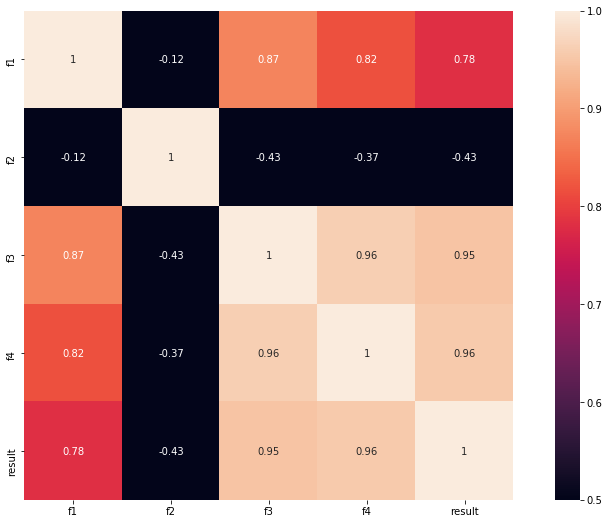

In [14]:
"""通过热力图可以看出f3,f4的对结果的协方差逼近了1，属于很强的正相关"""

# 画出相关性热力图
a = plt.subplots(figsize=(15,9))#调整画布大小
a = sns.heatmap(df.corr(), vmin=.5, vmax=1 , annot=True , square=True)#画热力图

## 特征选择方法——嵌入法（L1正则化选择特征）

In [12]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

#带L1惩罚项的逻辑回归作为基模型的特征选择
data_L1_selected = SelectFromModel(LogisticRegression(penalty="l1", C=0.1)).fit_transform(iris.data, iris.target)
data_L1_selected[:5]  # 去掉了第四个特征,这是因为它觉得34特征相关性太强，要一个就好，不是说特征4不重要

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


array([[5.1, 3.5, 1.4],
       [4.9, 3. , 1.4],
       [4.7, 3.2, 1.3],
       [4.6, 3.1, 1.5],
       [5. , 3.6, 1.4]])

## 特征选择方法——嵌入法（树模型选择特征）

In [13]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import ExtraTreesClassifier 

#树模型为基模型的特征选择,根据信息增益比来选择特征
data_tree_selected = SelectFromModel(ExtraTreesClassifier(max_depth=2)).fit_transform(iris.data, iris.target)
data_tree_selected[:5]  # 去除了f2，f2的信息增益比最低

C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2]])